In [5]:
# TASK DEFINITIONS
tasks = {
    # Custom Actions
    "brush teeth": {
        "needs": {"toothpaste": 1},  # Requires 1 unit of water
        "depletes": {"toothpaste": 1},  # Depletes 1 unit of toothpaste
        "place": "bathroom",  # Needs to be in the bathroom
        "cost": 15,  # Cost of brushing teeth
    },
    "drink water": {
        "needs": {"water": 1},  # Requires 1 unit of water
        "depletes": {"water": 1},  # Depletes 1 unit of water
        "place": "kitchen",
        "cost": 5,
    },
    "clean dish": {
        "needs": {"soap": 1},  # Requires 1 unit of soap
        "depletes": {"soap": 1},  # Depletes 1 unit of soap
        "place": "kitchen",
        "cost": 12,
    },
    "make soup": {
        "needs": {"water": 1, "tomato": 1},  # Requires 1 unit of water
        "depletes": {"water": 1, "tomato": 1},  # Depletes 1 unit of water
        "place": "kitchen",
        "cost": 12,
    },
    # Buy actions with costs
    "buy water": {
        "needs": {},  # No specific resource needs
        "depletes": {},  # No resources are depleted
        "place": "store",
        "cost": 20,
    },
    "buy toothpaste": {
        "needs": {},  # No specific resource needs
        "depletes": {},  # No resources are depleted
        "place": "store",
        "cost": 10,
    },
    "buy soap": {
        "needs": {},
        "depletes": {},
        "place": "store",
        "cost": 3,
    },

    # Refill actions with costs
    "refill toothpaste": {
        "needs": {},  # No specific resource needs
        "depletes": {},  # No resources are depleted
        "place": "storage",
        "cost": 6,
    },
    "refill soap": {
        "needs": {},
        "depletes": {},  
        "place": "storage",
        "cost": 1,
    },

    # INTERFACE
    "go to": {
        "needs": {},  # No specific resource needs  
        "depletes": {},  # No resources are depleted
        "place": {},
        "cost": 5,
    },
    "check": {
        "needs": {},
        "depletes": {},
        "place": {},
        "cost": 3,
    },
    "check inventory": {
        "needs": {},
        "depletes": {}, 
        "place": {},
        "cost": 1,
    }
    
}
temp_tasks = tasks.copy()

In [6]:
# STORAGES
main_stock = {}  # Main stock for refilling room-specific stocks
room_stocks = {}

In [7]:
# CHECK LEVELS OF RESOURCE
def check_needs(task, stringify=False):
    task = task.lower()
    if stringify:
        string = [f"{value} {key}" for key, value in tasks.get(task, {}).get("needs", {}).items()]
        formatted_string = ", ".join(string)
        if formatted_string == "":
            formatted_string = "no resources."
        return formatted_string
    else:
        return tasks.get(task, {}).get("needs", {})

# Method to check what a task depletes
def check_depletes(task):
    return tasks.get(task, {}).get("depletes", {})

def check_place(task):
    return tasks.get(task, {}).get("place", "")

def check_main_stock(resource):
    return main_stock.get(resource, 0)

# Method to check stock in a specific room
def check_room_stock(room, resource):
    return room_stocks.get(room, {}).get(resource, 0)

In [8]:
print(check_needs("Clean dish", stringify=True))

1 soap


In [9]:
# INITIALIZE PLAYER AND GAME
player_location = "bedroom"  # Starting location
total_cost = 0  # Track total cost

In [10]:
# Initialize main stock with resources
def init_main_stock(resources):
    global main_stock
    main_stock = resources.copy()

def init_room_stock(resources):
    global room_stocks
    room_stocks = resources.copy()

In [11]:
# Method to refill resources in a room from the main stock
def refill_room(room, resource, X):
    global total_cost, main_stock, room_stocks
    if main_stock.get(resource, 0) >= X:
        room_stocks[room][resource] += X
        main_stock[resource] -= X
        print(f"Refilled {X} {resource}(s) in the {room}. Main stock left: {main_stock[resource]}.")
        return True
    else:
        print(f"Not enough {resource} in the storage to refill {room}. Needed: {X}, Available: {main_stock.get(resource, 0)}.")
        return False

# Method to buy resources from the store to replenish the main stock
def buy_resource(resource, X):
    global total_cost, room_stocks, main_stock
    if room_stocks["store"].get(resource, 0) >= X:
        room_stocks["store"][resource] -= X
        main_stock[resource] = main_stock.get(resource, 0) + X
        print(f"Bought {X} {resource}(s) from the store. ")
        return True
    else:
        print(f"Store doesn't have enough {resource}. Needed: {X}, Available: {room_stocks['store'].get(resource, 0)}.")
        return False

# Method to change location
def goto(place):
    global player_location, total_cost
    if player_location != place:
        player_location = place
        print(f"Moved to {place}.")
    else:
        print(f"Already at {place}.")
    
# Method to check current location
def where():
    return player_location

In [12]:
def check_task_exist(task):
    amount = 0
    room = ''
    resource = 'NOT FOUND - the task existor checker'
    # go to storage
    if 'go to' in task:
         task = task.split()
         return True, ' '.join(task[:2]), 0, '', ' '.join(task[2:])
    
    # check inventory for water
    if 'check inventory' in task:
         # WARNING! check inventory does not return resource name
         return True, task.split()[0] + ' ' + task.split()[1], 0, '', ''
    
    # check kitchen for soap
    if 'check' in task:
         return True, task.split()[0], 0, '', ''
    
    # Buy 5 apple
    if 'buy' in task:
        task = task.split()
        amount = task[1]
        resource = ' '.join(task[2:])
        task.pop(1)
        task = ' '.join(task)

    # Refill kitchen with 6 water
    if 'refill' in task:
        words = task.split()
        index = words.index('with')
        amount = words[index+1]
        resource = ' '.join(words[index+2:])
        task = 'refill '
        for word in words:
            if word.isdigit():
                task += ' '.join(words[words.index(word)+1:])
                room = ' '.join(words[1:words.index(word)-1])
        
        
    if task not in tasks:
        print(f"Task '{task}' not recognized.")
        return False, task, amount, resource, room
    else:
        return True, task, amount, resource, room
    
print(check_task_exist("go to living room"))

(True, 'go to', 0, '', 'living room')


In [13]:
def lowercase_list(input_list):
    return [item.lower() for item in input_list]

In [14]:
def check_task_coverage(list1, list2):
    # Checks if the og list is a subset of the candidate list
    return set(list2).issubset(set(list1))

In [15]:
# Function to execute tasks

def execute_tasks(task_list, needed_tasks):
    print("Now executing", task_list, "AGAINST", needed_tasks)

    def get_return_func(outcome):
        return [outcome, accuracy, total_cost]
    
    # Set up cost variables
    global total_cost
    total_cost = 0

    # Tracking accuracy
    completed_tasks = []
    accuracy = 0

    task_list = lowercase_list(task_list)
    needed_tasks = lowercase_list(needed_tasks)

    if not check_task_coverage(task_list, needed_tasks):
        print("given task list is not a subset of needed tasks")
    for task in task_list:
        task = task.lower()
        print("Now executing", task)
        quant = False
        # Check if task exists
        bool_key = check_task_exist(task) # (Task valid bool, viable task key, amount, resource, room)
        if not bool_key[0]:
            return get_return_func("Failure, the task does not exist in the task dictionary.") + [task]
        
        elif 'check inventory' in task:
            resource = task.split()[3]
            print(check_main_stock(resource))

        elif 'check' in task:
            room = task.split()[1]
            resource = task.split()[3]
            print(check_room_stock(room, resource))

        elif 'go to' in task or 'Go to' in task:
            print("Going to ", bool_key[4])
            place = bool_key[4]
            goto(place)
        else:
            place = check_place(bool_key[1])
        
            # Now process place conditioned tasks
            if where() != place:
                print(f'Must be at {place}. You are at {where()}.')
                return get_return_func("Failure" + f'Must be at {place}. You are at {where()}.') + [task]


            elif 'buy' in task:
                resource = bool_key[3]
                quantity = int(bool_key[2])
                buy_success = buy_resource(resource, quantity)
                if not buy_success:
                    return [f"Failure, buying {resource} failed. Walmart doesnt have enough {resource}.", accuracy, total_cost, task]
                quant = True

            elif 'refill' in task:
                room = bool_key[4]
                resource = bool_key[3]
                quantity = int(bool_key[2])
                refill_success = refill_room(room, resource, quantity)
                if not refill_success:
                    return [f"Failure, refilling {resource} in {room} failed", accuracy, total_cost, task]
                quant = True
            else:
                # Check if required resources are available in the current room
                needs = check_needs(task)
                for resource, amount in needs.items():
                    if check_room_stock(where(), resource) < amount:
                        print(f"Not enough {resource} in {where()} to complete {task}. Needed: {amount}, Available: {check_room_stock(where(), resource)}.")
                        return get_return_func("Failure, !needs_req" + f"Not enough {resource} in {where()} to complete {task}. Needed: {amount}, Available: {check_room_stock(where(), resource)}.") + [task]
                
                # Deplete resources from the room stock
                depletes = check_depletes(task)
                for resource, amount in depletes.items():
                    if check_room_stock(where(), resource) >= amount:
                        print(where(), resource, amount)
                        room_stocks[where()][resource] -= amount
                        print(f"Depleted {amount} {resource}(s) in {where()} for {task}. Remaining: {room_stocks[where()][resource]}")
                    else:
                        print(f"Not enough {resource} in {where()} to complete {task}. Needed: {amount}, Available: {check_room_stock(where(), resource)}.")
                        return get_return_func("Failure" + f"Not enough {resource} in {where()} to complete {task}. Needed: {amount}, Available: {check_room_stock(where(), resource)}.") + [task]

        # Add task cost to total cost
        task_cost = tasks[bool_key[1]]["cost"]
        if quant == True:
            task_cost = quantity * task_cost
        total_cost += task_cost

        if task in needed_tasks:
            completed_tasks.append(task)
        common_elements = set(needed_tasks).intersection(completed_tasks)
        print(common_elements)
        # Calculate the percentage
        accuracy = (len(common_elements) / len(needed_tasks))
        #accuracy = len(completed_tasks) / len(needed_tasks)
        print(f"Executed {task} for cost {task_cost}. New total cost: {total_cost}")
    
    print(f"All tasks executed successfully. Total cost: {total_cost}")
    if accuracy == 1.0:
        return get_return_func("Success") + [task]
    else:
        return get_return_func("Failure. Executed all candidate tasks but did not complete all needed tasks") + [task]



In [16]:
def prompt_maker(task_list, CoT = False):
    print("WELCOME TO THE GAME! Getting prompt...")
    initial_prompt = f"Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn't have enough resources, you can buy from the store! \n"
    initial_prompt += f"You are standing in the {where()}. The home has: \n"
    # TODO: specify amount needed for each task
    
    # Give the agent rooms and their stock counts.
    room_str = ''
    for key, sub_dict in room_stocks.items():
        # Create a list of "value subkey" pairs
        sub_items = [f"{value} {sub_key}" for sub_key, value in sub_dict.items()]
        if sub_items == []:
            continue
        
        # Join the items with commas and "and" for the last item
        sub_items_joined = ", ".join(sub_items[:-1]) + " and " + sub_items[-1]
        
        # Print the sentence for each outer dictionary key
        room_str +=(f"A {key} with {sub_items_joined}. \n")
    initial_prompt += room_str
    initial_prompt += f"Your home's storage has: \n"

    stock_str = ', '.join([f"{value} {key}" for key, value in main_stock.items()])
    initial_prompt += f"{stock_str}. \n"

    # tasks
    initial_prompt += f"\n Your tasks are: \n"
    task_set = set()
    for task in task_list:
        task_set.add(task)
        initial_prompt += f"Task: {task}\n"
    for tasks in task_set:
        needs = check_needs(tasks, stringify=True)
        initial_prompt += f"The task {tasks} needs {needs} \n"
    

    # final instructions
    initial_prompt += f"\n These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.\n Be careful about the given resource contraints and where you are. \n You can add refill, buy, and go to commands at a cost. \nFor example, the costs of buying one item are proportional to real world costs.\n"
    initial_prompt += f"\n You can buy items from the store to restock your storage by saying: \"buy <amount> <item>\" You must be in the store to buy items. For example: \'buy 3 water.\' and you must 'go to store.' beforehand \n"
    initial_prompt += f"You can refill any room with items in your storage by saying: \"refill <room_name> with <amount> <item>\" You must be in the storage to refill items. For example: \'refill kitchen with 7 toothpaste.\' and you must 'go to storage.' beforehand\n"
    initial_prompt += f"You can go to a room by saying \"go to <room_name>\". For example: \'go to store\'.\n"
    initial_prompt += f"If a room doesn't have enough resources, you can refill from the storage. If even the storage doesn't have enough resources, you can buy from the store. \n"
    initial_prompt += f"Remember to not edit the tasks with anything. Example: \"brush teeth\" remains as \"brush teeth\" with no other descriptions in the final list.\n"
    initial_prompt += f"Lastly, format your final list of tasks as a python list. For example: [\"go to store\", \"buy 3 toothpaste\"]. Your list's tasks will then be executed by an executor one by one.\n"
    initial_prompt += f"Since, the executor only recognizes tasks, the list you return must be a list of just atomic tasks. Like \"go to store\". or \"polish glass\". Do not add any steps or thinking in your answer or the executor will break.\n"
    
    if CoT == True:
        initial_prompt += f"Reason through each step of the plan before proceeding. Explain your thought process for the correct order of actions."
    
    return initial_prompt, room_str, stock_str

In [17]:
# Initialize storage/pantry with resources
# Easy Example
init_main_stock({"water": 5, "toothpaste": 0})
init_room_stock({# Dictionary to hold stocks for each room
    "bedroom" : {"water": 0, "bed": 1},
    "kitchen": {"water": 0, "soap": 1},
    "bathroom": {"water": 0, "toothpaste": 0},
    "store": {"water": 100, "soap": 100, "toothpaste": 100},})

# Define a list of tasks to execute
task_list = ["brush teeth"]

print(prompt_maker(task_list))

candidate_task_list = [
    "go to store",
    "buy 3 toothpaste",
    "go to storage",
    "refill bathroom with 1 toothpaste",
    "go to bathroom",
    "brush teeth"
]
# result = execute_tasks(task_list)
result_correct = execute_tasks(candidate_task_list, task_list)
# print(result)
print(result_correct)





WELCOME TO THE GAME! Getting prompt...
('Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn\'t have enough resources, you can buy from the store! \nYou are standing in the bedroom. The home has: \nA bedroom with 0 water and 1 bed. \nA kitchen with 0 water and 1 soap. \nA bathroom with 0 water and 0 toothpaste. \nA store with 100 water, 100 soap and 100 toothpaste. \nYour home\'s storage has: \n5 water, 0 toothpaste. \n\n Your tasks are: \nTask: brush teeth\nThe task brush teeth needs 1 toothpaste \n\n These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.\n Be careful about the given resource contraints and where you are. \n You can add refill, buy, and go to commands at a

In [18]:
# Harder Example INCOORECT BRONZE

init_main_stock({"water": 5, "toothpaste": 0, "soap": 1})
goto("bedroom")

task_list = ["Clean dish",
             "Clean dish",
             "Clean dish"]
print(prompt_maker(task_list))

candidate_task_list = [
    "go to kitchen",
    "Clean dish",
    "clean dish",
    "Clean dish"
]
execute_tasks(candidate_task_list, task_list)

Moved to bedroom.
WELCOME TO THE GAME! Getting prompt...
('Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn\'t have enough resources, you can buy from the store! \nYou are standing in the bedroom. The home has: \nA bedroom with 0 water and 1 bed. \nA kitchen with 0 water and 1 soap. \nA bathroom with 0 water and 0 toothpaste. \nA store with 100 water, 100 soap and 97 toothpaste. \nYour home\'s storage has: \n5 water, 0 toothpaste, 1 soap. \n\n Your tasks are: \nTask: Clean dish\nTask: Clean dish\nTask: Clean dish\nThe task Clean dish needs 1 soap \n\n These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.\n Be careful about the given resource contraints and where you are

['Failure, !needs_reqNot enough soap in kitchen to complete clean dish. Needed: 1, Available: 0.',
 0.3333333333333333,
 17,
 'clean dish']

In [19]:
# Harder Example SOLVED GOLD

init_main_stock({"water": 5, "toothpaste": 0, "soap": 1})
init_room_stock(
    {"bedroom" : {"water": 0, "bed": 1},
    "kitchen": {"water": 0, "soap": 1},
    "bathroom": {"water": 0, "toothpaste": 0},
    "store": {"water": 100, "soap": 100, "toothpaste": 100}},
)
goto("bedroom")
room_stocks["kitchen"]["soap"] = 1

task_list = ["Clean dish",
             "Clean dish",
             "Clean dish"]
print(prompt_maker(task_list))

candidate_task_list = [
    "go to store",
    "Buy 1 soap",
    "go to storage",
    "Refill kitchen with 2 soap",
    "go to kitchen",
    "Clean dish",
    "clean dish",
    "Clean dish"
]
execute_tasks(candidate_task_list, task_list)

Moved to bedroom.
WELCOME TO THE GAME! Getting prompt...
('Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn\'t have enough resources, you can buy from the store! \nYou are standing in the bedroom. The home has: \nA bedroom with 0 water and 1 bed. \nA kitchen with 0 water and 1 soap. \nA bathroom with 0 water and 0 toothpaste. \nA store with 100 water, 100 soap and 100 toothpaste. \nYour home\'s storage has: \n5 water, 0 toothpaste, 1 soap. \n\n Your tasks are: \nTask: Clean dish\nTask: Clean dish\nTask: Clean dish\nThe task Clean dish needs 1 soap \n\n These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.\n Be careful about the given resource contraints and where you ar

['Failure. Executed all candidate tasks but did not complete all needed tasks',
 0.3333333333333333,
 56,
 'clean dish']

In [20]:
# Harder Example SOLVED SILVER

init_main_stock({"water": 5, "toothpaste": 0, "soap": 1})
goto("bedroom")
room_stocks["kitchen"]["soap"] = 1

task_list = ["Clean dish",
             "Clean dish",
             "Clean dish"]
print(prompt_maker(task_list))

candidate_task_list = [
    "go to kitchen",
    "clean dish",
    "go to storage",
    "refill kitchen with 1 soap",
    "go to kitchen",
    "clean dish",
    "go to store",
    "buy 1 soap",
    "go to storage",
    "refill kitchen with 1 soap",
    "go to kitchen",
    "clean dish"
]
execute_tasks(candidate_task_list, task_list)

Moved to bedroom.
WELCOME TO THE GAME! Getting prompt...
('Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn\'t have enough resources, you can buy from the store! \nYou are standing in the bedroom. The home has: \nA bedroom with 0 water and 1 bed. \nA kitchen with 0 water and 1 soap. \nA bathroom with 0 water and 0 toothpaste. \nA store with 100 water, 99 soap and 100 toothpaste. \nYour home\'s storage has: \n5 water, 0 toothpaste, 1 soap. \n\n Your tasks are: \nTask: Clean dish\nTask: Clean dish\nTask: Clean dish\nThe task Clean dish needs 1 soap \n\n These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.\n Be careful about the given resource contraints and where you are

['Failure. Executed all candidate tasks but did not complete all needed tasks',
 0.3333333333333333,
 71,
 'clean dish']

In [21]:
def setup_hard():
    init_main_stock({"water": 5, "toothpaste": 0, "soap": 1})
    init_room_stock({# Dictionary to hold stocks for each room
    "bedroom" : {"water": 0, "bed": 1},
    "kitchen": {"water": 0, "soap": 1},
    "bathroom": {"water": 0, "toothpaste": 0},
    "store": {"water": 100, "soap": 100, "toothpaste": 100},})
    room_stocks['kitchen']['soap'] = 0
    goto("bedroom")
    room_stocks["kitchen"]["soap"] = 1

    task_list = ["Clean dish",
                "Clean dish",
                "Clean dish"]
    
    prompt =prompt_maker(task_list)
    return prompt, task_list

TESTING with GPT.
You can use the get_GPT_plan method to feed the prompt and get a task list. You can use the setup() method to reset storage levels.

In [ ]:
from openai import OpenAI
from pydantic import BaseModel

client = OpenAI()

class TaskList(BaseModel):
    tasklist: list[str]

def get_GPT_plan(prompt):
  response = client.beta.chat.completions.parse(
    model="gpt-4o-2024-08-06",
    messages=[
      {"role": "system", "content": "You are a master task scheduler that outputs a list of tasks in the correct order given a long horizon task."},
      {"role": "user", "content": prompt}
    ],
    response_format=TaskList
  )
  return response.choices[0].message.parsed.tasklist

message = get_GPT_plan("Your job is to plan in a env with a kitchen with 4 apples. The task is to make 5 apple pies")
print(message)

['Assess the current inventory: Confirm there are 4 apples in the kitchen.', 'Gather additional ingredients needed for apple pie: flour, butter, sugar, cinnamon, lemon juice, etc.', 'Identify how many apples are needed for one apple pie.', 'Calculate the total apples required for 5 apple pies.', 'Determine the number of extra apples needed beyond the 4 apples available.', 'Plan a trip to purchase additional apples.', 'Purchase the number of apples needed to make up the shortfall.', 'Return to the kitchen and store new apples properly before use.', 'Preheat the oven to the required temperature for baking apple pies.', 'Wash and peel all apples, removing cores and slicing them thinly.', 'Prepare the pie dough by mixing flour, butter, and water until the correct consistency is achieved, and let it chill.', 'Mix the apples with sugar, cinnamon, and lemon juice for the filling.', 'Roll out the pie dough and line the pie tins.', 'Fill the pie crusts with the apple mixture.', 'Cover the pies 

In [23]:
import numpy as np
import matplotlib.pyplot as plt

prompt, task_list = setup_hard()
print(prompt)

total_accuracy = np.array([])
cost = np.array([])

for i in range(10): 
  setup_hard()
  message = get_GPT_plan(prompt)
  print(f"\n\n message: \n {message}\n\n")
  eval = execute_tasks(message, task_list)
  print(eval[0])
  print(eval[1])
  total_accuracy = np.append(total_accuracy, eval[1])
  cost = np.append(cost, eval[2])

print('Overall accuracy: ', total_accuracy.mean())

# Number of trials (x-axis values)
trials = np.arange(1, len(total_accuracy) + 1)

plt.figure()  # Create a new figure for the first plot
plt.plot(trials, total_accuracy, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Trials Vanilla GPT')
plt.xlabel('Trials')
plt.ylabel('Accuracy (%)')

# Create the second plot for another model (e.g., Model B)
plt.figure()  # Create a new figure for the second plot
plt.plot(trials, cost, marker='s', linestyle='--', color='r')
plt.title('Cost over Trials')
plt.xlabel('Trials')
plt.ylabel('Cost')

# Show both plots
plt.show()



Moved to bedroom.
WELCOME TO THE GAME! Getting prompt...
('Hello! You are a butler in a home that has many rooms and a storage that acts as a pantry. You goal is to finish the tasks I will give you. Beware! These tasks require resources and may even deplete resources. You can use the storage to refill them! If even the storage doesn\'t have enough resources, you can buy from the store! \nYou are standing in the bedroom. The home has: \nA bedroom with 0 water and 1 bed. \nA kitchen with 0 water and 1 soap. \nA bathroom with 0 water and 0 toothpaste. \nA store with 100 water, 100 soap and 100 toothpaste. \nYour home\'s storage has: \n5 water, 0 toothpaste, 1 soap. \n\n Your tasks are: \nTask: Clean dish\nTask: Clean dish\nTask: Clean dish\nThe task Clean dish needs 1 soap \n\n These tasks are given in a random order.Your job is to rearrange these tasks in the correct order. You can also add go to, buy, and refill commands.\n Be careful about the given resource contraints and where you ar

BadRequestError: Error code: 400 - {'error': {'message': "Invalid type for 'messages[1].content[0]': expected an object, but got a string instead.", 'type': 'invalid_request_error', 'param': 'messages[1].content[0]', 'code': 'invalid_type'}}

AUTO TRAINING DATA GEN STARTS HERE

In [24]:
from pprint import pprint
tasks = {
    "go to": {
        "needs": {},  # No specific resource needs  
        "depletes": {},  # No resources are depleted
        "place": {},
        "cost": 5,
    },
    "check": {
        "needs": {},
        "depletes": {},
        "place": {},
        "cost": 3,
    },
    "check inventory": {
        "needs": {},
        "depletes": {}, 
        "place": {},
        "cost": 1,
    }
}

In [25]:
class Cost(BaseModel):
    cost: int
def set_price(resource):
    message = client.beta.chat.completions.parse(
      model="gpt-4o-2024-08-06",
      messages=[
        {"role": "system", "content": "You are a master task creator for a home environment"},
        {"role": "user", "content": f"""You are tasked with setting the price for {resource}. The price can be between 1 and 20. For context, a toothpase is 5 and soap is 3."""
         }
      ],
      response_format=Cost
    )
    return message.choices[0].message.parsed.cost

set_price("trimmer")

15

In [26]:
from typing import Dict

class Task(BaseModel):
    task_description: str
    needs: str       # A dictionary of needs, e.g., {"water": 1}
    amount_needs: int
    depletes: str    # A dictionary of depleted resources, e.g., {"water": 1}
    amount_depletes: int
    place: str                  # Location where the task happens, e.g., "kitchen"
    cost: int                   # Associated cost, e.g., 5

class TaskNoNeed(BaseModel):
    task_description: str
    place: str                  # Location where the task happens, e.g., "kitchen"
    cost: int                   # Associated cost, e.g., 5

class Tasks(BaseModel):
    generated_list: list[Task]

task_example = '''"light 2 candles": {
    "needs": {"candle": 2},
    "depletes": {"candle": 0},
    "place": "bedroom",
    "cost": 5
}'''

car_example = ''' 'polish car dashboard': {  'cost': 7, 'depletes': {  'soap': 2}, 'needs': {'soap': 2},'place': 'garage'} '''

def task_gen_no_needs(room, tasks_done):
    message = client.beta.chat.completions.parse(
      model="gpt-4o-2024-08-06",
      messages=[
        {"role": "system", "content": "You are a master task creator for a home environment"},
        {"role": "user", "content": f"""You are tasked with creating a task to be done by a butler in a home environment. 
         The task must be something that can be done in a {room}. Give the task descripton in about 3 to 5 words. 
         Lastly, you will assign a cost to the task between 1 and 20. A cost of one might be for dusting the coffee table. 
         A cost of 20 would be for cooking chicken pasta. The format is:{task_example}.""" +
         "Keep resource names in your response singular."+
         "Please avoid creating tasks of this nature since you have already suggested them: " + str(tasks_done) +
         "Forbidden tasks also include any that have the phrases 'go to', 'refill', or 'buy'"
         }
      ],
      response_format=TaskNoNeed
    )
    return message.choices[0].message.parsed

def resource_needed_gen(room, resource_types, min_resources, resource_used):
    pass

def task_gen(room, resource_types, min_resources, resource_used):
    message = client.beta.chat.completions.parse(
      model="gpt-4o-2024-08-06",
      messages=[
        {"role": "system", "content": "You are a master task creator for a home environment"},
        {"role": "user", "content": f"""You are tasked with creating a task to be done by a butler in a home environment. 
         The task must be something that can be done in a {room}. Give the task descripton in about 3 to 5 words. 
         
         
         REMOVE: You must also decide what resource will be needed. 
         You must decide one resonable resource that the task needs from this list: {resource_types}
         You decide how much of a resource will be needed. It must need quantity {min_resources} at the minimum. Be reasonable and use common sense.
         
         You can choose if the resource will be depleted or not depending on the nature of the task you decide to generate. 
         If you decide to deplete it must be {min_resources}. 
         BEWARE: You do not have to assign anything to be depleted. You can just put nothing in the depletes section and a 0 for amount depleted. 

         Lastly, you will assign a cost to the task between 1 and 20. A cost of 3 might be for dusting the coffee table. 
         A cost of 17 would be for cooking chicken pasta. The format is:{str(task_example)}.""" + 

         "Please avoid creating a task that uses or in general using these resources: " + str(resource_used) +
         "Keep resource names in your response singular." +
         "Please avoid creating tasks of this nature since you have already suggested them: " + str(tasks.keys()) +
         
         "Forbidden task names are synomyms of these tasks, like 'Replenish' or 'Purchase' and 'Check'" +
         "Never return a task that has the words: 'go to', 'refill', or 'buy'." +
         "Lastly, always make sure that the resource you have chosen for the task to need is reasonable." +
         " Here are some examples" +
         str({car_example}), 
        
        }
      ],
      response_format=Task
    )
    return message.choices[0].message.parsed
# print(task_gen("kitchen", ["water", "coffee"], 3, "windex"))

In [27]:
house_resources = {
    "kitchen": [
        "compost bags", 
        "dish soap", 
        "cooking oil", 
        "spices", 
        "paper towels", 
        "food items", 
        "cleaning wipes", 
        "baking supplies", 
        "coffee/tea", 
        "dish detergent"
    ],
    "living room": [
        "candles", 
        "batteries", 
        "light bulbs", 
        "cleaning supplies", 
        "air fresheners", 
        "pet food", 
        "coasters", 
        "decorative items", 
        "throw blankets", 
        "beverages"
    ],
    "bathroom": [
        "toilet paper", 
        "soap", 
        "shampoo", 
        "cleaning products", 
        "cotton swabs", 
        "air fresheners", 
        "trash bags", 
        "towels", 
        "deodorant", 
        "shaving cream"
    ],
    "bedroom": [
        "bed linens", 
        "laundry detergent", 
        "scented candles", 
        "moisturizer", 
        "deodorant", 
        "hygiene products", 
        "blankets", 
        "beverages", 
        "batteries", 
        "pillows"
    ],
    "dining room": [
        "food items", 
        "beverages", 
        "candles", 
        "napkins", 
        "cleaning supplies", 
        "condiments", 
        "utensils", 
        "dishware", 
        "table decorations", 
        "tablecloths"
    ],
    "garage": [
        "gasoline", 
        "cleaning supplies", 
        "oil", 
        "batteries", 
        "maintenance fluids", 
        "trash bags", 
        "paint", 
        "lubricants", 
        "spare parts", 
        "petrol"
    ],
    "laundry room": [
        "laundry detergent", 
        "fabric softener", 
        "stain removers", 
        "dryer sheets", 
        "air fresheners", 
        "cleaning supplies", 
        "lint rollers", 
        "hangers", 
        "trash bags", 
        "laundry baskets"
    ],
    "home office": [
        "printer ink", 
        "paper", 
        "batteries", 
        "office supplies", 
        "cleaning supplies", 
        "notebooks", 
        "sticky notes", 
        "trash bags", 
        "coffee/tea", 
        "whiteboard markers"
    ],
    "hallway": [
        "light bulbs", 
        "cleaning supplies", 
        "air fresheners", 
        "batteries", 
        "trash bags", 
        "welcome mats", 
        "shoe polish", 
        "seasonal decorations", 
        "umbrellas", 
        "coat hangers"
    ],
    "basement": [
        "cleaning supplies", 
        "dehumidifier water", 
        "light bulbs", 
        "batteries", 
        "safety supplies", 
        "tools", 
        "storage bins", 
        "trash bags", 
        "spare parts", 
        "lawn care supplies"
    ]
}

print(np.hstack(np.array(list(house_resources.values()))))


['compost bags' 'dish soap' 'cooking oil' 'spices' 'paper towels'
 'food items' 'cleaning wipes' 'baking supplies' 'coffee/tea'
 'dish detergent' 'candles' 'batteries' 'light bulbs' 'cleaning supplies'
 'air fresheners' 'pet food' 'coasters' 'decorative items'
 'throw blankets' 'beverages' 'toilet paper' 'soap' 'shampoo'
 'cleaning products' 'cotton swabs' 'air fresheners' 'trash bags' 'towels'
 'deodorant' 'shaving cream' 'bed linens' 'laundry detergent'
 'scented candles' 'moisturizer' 'deodorant' 'hygiene products' 'blankets'
 'beverages' 'batteries' 'pillows' 'food items' 'beverages' 'candles'
 'napkins' 'cleaning supplies' 'condiments' 'utensils' 'dishware'
 'table decorations' 'tablecloths' 'gasoline' 'cleaning supplies' 'oil'
 'batteries' 'maintenance fluids' 'trash bags' 'paint' 'lubricants'
 'spare parts' 'petrol' 'laundry detergent' 'fabric softener'
 'stain removers' 'dryer sheets' 'air fresheners' 'cleaning supplies'
 'lint rollers' 'hangers' 'trash bags' 'laundry baskets' 

In [29]:
# Generate Test Data

# push to require:
# trips to the store/buy req = Boolean. This would mean that the sum of resources in rooms and pantry is less than what is needed.

# trips to the pantry/buy refill = N where N < number of rooms involved. A trip to the pantry is needed when the resources in the room are less than what is needed. Namely, number of resources in room are less than
# what the task needs. To achieve complexity N, we initialize the room X with 1 (or more) less than what is needed for the task in room X.

# go to requirements: To force an additional N go to's excluding the ones needed for trips to the store or pantry, add custom tasks in N + 1 different rooms.

# We have sandwiches here: 'go to storage, refill X in X, go to room X' should be triggered in a gold trajectory when a deficit exists.

rooms = list(house_resources.keys())
#resource_types = ["toothpaste", "soap", "tomato", "bread", "butter", "milk", "windex", "clorox wipe", "toilet paper", "candle", "apple", "oat"]
resource_types = np.hstack(np.array(list(house_resources.values())))


def generate_training_data(buy_req=False, trip_req=0, goto_req=0, no_needs = 0, resource_types=resource_types):
        
    min_resources = buy_req + trip_req
    min_tasks = goto_req + buy_req + trip_req

    # call gpt and ask for a random task
    # Custom Tasks Generation
    resource_used = []
    gen_tasks = []
    tasks_done = []
    for j in range(no_needs):
        room = rooms[np.random.randint(0, len(rooms))]
        task = task_gen_no_needs(room, tasks_done)
        tasks_done.append(task.task_description.lower())
        tasks[task.task_description.lower()] = { "needs" : {}, "depletes" : {}, "place": room, "cost": task.cost}
        gen_tasks.append(task.task_description.lower())

    for i in range(min_tasks):
        room = rooms[np.random.randint(0, len(rooms))]
        num_resources = np.random.randint(min_resources+1, min_resources + 3)
        resource_types = house_resources[room]
        task = task_gen(room, house_resources, num_resources, resource_used)
        if task.depletes == '':
            task.depletes = task.needs
        tasks[task.task_description.lower()] = { "needs" : {task.needs: task.amount_needs}, "depletes" : {task.depletes: task.amount_depletes}, "place": room, "cost": task.cost}
        resource = task.needs
        price = set_price(task.needs)
        tasks["refill " + resource] = { "needs" : {}, "depletes" : {}, "place": "storage", "cost": 5}
        tasks["buy " + resource] = { "needs" : {}, "depletes" : {}, "place": "store", "cost": price}
        resource_used.append(task.needs)
        gen_tasks.append(task.task_description.lower())
    
    return tasks, gen_tasks

#tasks, gen_tasks = generate_training_data(buy_req=True, trip_req=2, goto_req=3, no_needs=3)
pprint(tasks, indent=4)

    





{   'check': {'cost': 3, 'depletes': {}, 'needs': {}, 'place': {}},
    'check inventory': {'cost': 1, 'depletes': {}, 'needs': {}, 'place': {}},
    'fold clean laundry': {   'cost': 10,
                              'depletes': {},
                              'needs': {},
                              'place': 'laundry room'},
    'go to': {'cost': 5, 'depletes': {}, 'needs': {}, 'place': {}},
    'organize tool rack': {   'cost': 8,
                              'depletes': {},
                              'needs': {},
                              'place': 'garage'},
    'set table perfectly': {   'cost': 7,
                               'depletes': {},
                               'needs': {},
                               'place': 'dining room'}}


In [ ]:
def main_stock_maker(task_list):
    temp_main_stock = {}
    for task in task_list:
        needs_dict = tasks[task]['needs']
        for resource, amount in needs_dict.items():
            temp_main_stock[resource] = temp_main_stock.get(resource, 0) + 0
    return temp_main_stock


In [30]:

def room_stocks_maker(task_list):
    global room_stocks
    room_stocks.clear()
    resource_set = set()
    temp_room_stocks = {}
    for task in task_list:
        room = tasks[task]['place']
        temp_room_stocks[room] = temp_room_stocks.get(room, {})
        needs_dict = tasks[task]['needs']
        for resource, amount in needs_dict.items():
            temp_room_stocks[room][resource] = temp_room_stocks[room].get(resource, 0) + amount
    temp_room_stocks["store"] = {resource: 0 for resource in resource_set}
    print("I've updated room_stocks", temp_room_stocks)
  
    return temp_room_stocks

        
        

In [31]:
def setup_game(task_list):
    print("Setting up the game...")
    goto("start")
    room_stocks_filled = room_stocks_maker(task_list)
    main_stock_filled = main_stock_maker(task_list)
    init_main_stock(main_stock_filled)
    init_room_stock(room_stocks_filled)
    prompt = prompt_maker(task_list, CoT=True)
    return prompt, task_list


In [32]:

prompt, task_list = setup_game(gen_tasks)
new_list = get_GPT_plan(prompt[0])
print(prompt[1])
print(prompt[2])

NameError: name 'gen_tasks' is not defined

In [ ]:
#execute_tasks(new_list, task_list)
total_accuracy = []
cost = []
for i in range(4): 
  prompt, needed_task_list = setup_game(gen_tasks)
  prompt = prompt[0]
  print("TASKLIST", needed_task_list, prompt)
  candidate_task_list = get_GPT_plan(prompt)
  print(f"\n\n message: \n {candidate_task_list}\n\n")
  eval = execute_tasks(candidate_task_list, needed_task_list)
  print(eval)
  print("Outcome: ", eval[0])
  print("Trial accuracy: ", eval[1])
  total_accuracy = np.append(total_accuracy, eval[1])
  cost = np.append(cost, eval[2])

print('Overall accuracy: ', total_accuracy.mean())

# Number of trials (x-axis values)
trials = np.arange(1, len(total_accuracy) + 1)

plt.figure()  # Create a new figure for the first plot
plt.plot(trials, total_accuracy, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Trials Vanilla GPT')
plt.xlabel('Trials')
plt.ylabel('Accuracy (%)')

# Create the second plot for another model (e.g., Model B)
plt.figure()  # Create a new figure for the second plot
plt.plot(trials, cost, marker='s', linestyle='--', color='r')
plt.title('Cost over Trials')
plt.xlabel('Trials')
plt.ylabel('Cost')

# Show both plots
plt.show()

Setting up the game...
Moved to start.


KeyError: 'arrange throw pillow'

In [33]:

from collections import defaultdict
def gold_trajectory_generator(needed_task_list):
    setup_game(needed_task_list)
    gold_list = []
    room_to_task = defaultdict(list)
    for task in needed_task_list:
        room_to_task[tasks[task]['place']].append(task)
    for key, value in room_to_task.items():
        gold_list.append("go to " + key)
        for task in value:
            gold_list.append(task)
    return gold_list
print(needed_task_list)            
gold_list = gold_trajectory_generator(gen_tasks)
print(gold_list)

eval = execute_tasks(gold_list, needed_task_list)
print(eval[0])
print(eval[1])

NameError: name 'needed_task_list' is not defined

In [ ]:
import random
export_tasks = {}
# bigger keys are: unique id
# sub keys are: prompt, tasks_dict, needed_tasks, gold_list, gpt_list, gpt_eval, gold_eval

needed_simple_tasks = 100
for i in range(needed_simple_tasks):
    try:
        tasks = temp_tasks.copy()
        unique_id = random.randint(1000000, 9999999)
        export_tasks[unique_id] = {}

        tasks_dict, needed_tasks = generate_training_data(buy_req=True, trip_req=2, goto_req=3, no_needs=3)
        export_tasks[unique_id]["tasks_dict"] = tasks_dict
        export_tasks[unique_id]["needed_tasks"] = needed_tasks
        tasks = tasks_dict.copy()
        gold_list = gold_trajectory_generator(needed_tasks)
        export_tasks[unique_id]["gold_list"] = gold_list

        big_prompt, task_list = setup_game(needed_tasks)
        prompt = big_prompt[0]
        export_tasks[unique_id]["prompt"] = prompt
        export_tasks[unique_id]["room_stocks"] = big_prompt[1]
        export_tasks[unique_id]["main_stock"] = big_prompt[2]

        gpt_list = get_GPT_plan(prompt)
        export_tasks[unique_id]["gpt_list"] = gpt_list

        print("Tasks after generation", tasks)
        print("Room stocks before GPT evaluation: ", room_stocks)
        gpt_eval = execute_tasks(gpt_list, needed_tasks)
        export_tasks[unique_id]["gpt_eval"] = gpt_eval

        print(gpt_eval[0])
        print(gpt_eval[1])

        prompt, task_list = setup_game(needed_tasks)
        print("Room stocks before gold evaluation: ", room_stocks)
        gold_eval = execute_tasks(gold_list, needed_tasks)
        export_tasks[unique_id]["gold_eval"] = gold_eval

        print(gold_eval[0])
        print(gold_eval[1])
    except Exception as e:
        # Print or log the error to understand what went wrong, but continue with the next iteration
        print(f"An error occurred during iteration {i} with unique_id {unique_id}: {e}")
        # Optionally, remove the failed unique_id from export_tasks if partial data is unwanted
        export_tasks.pop(unique_id, None)

pprint(export_tasks, indent=3)




Setting up the game...
Moved to start.
I've updated room_stocks {'laundry room': {}, 'bedroom': {'pillow': 6}, 'home office': {}, 'dining room': {'cleaning supply': 4}, 'living room': {'decorative item': 5}, 'basement': {'storage bin': 6}, 'garage': {'maintenance fluid': 5}, 'hallway': {'shoe polish': 4}, 'store': {}}
WELCOME TO THE GAME! Getting prompt...
Setting up the game...
Already at start.
I've updated room_stocks {'laundry room': {}, 'bedroom': {'pillow': 6}, 'home office': {}, 'dining room': {'cleaning supply': 4}, 'living room': {'decorative item': 5}, 'basement': {'storage bin': 6}, 'garage': {'maintenance fluid': 5}, 'hallway': {'shoe polish': 4}, 'store': {}}
WELCOME TO THE GAME! Getting prompt...
Tasks after generation {'brush teeth': {'needs': {'toothpaste': 1}, 'depletes': {'toothpaste': 1}, 'place': 'bathroom', 'cost': 15}, 'drink water': {'needs': {'water': 1}, 'depletes': {'water': 1}, 'place': 'kitchen', 'cost': 5}, 'clean dish': {'needs': {'soap': 1}, 'depletes': {

{1890982: {'gpt_eval': ['Failure, buying light bulb failed. Walmart doesnt have enough light bulb.', 0.1111111111111111, 21, 'buy 6 light bulb'], 'gold_eval': ['Success', 1.0, 105, 'fix basement tools']}, 9927498: {'gpt_eval': ['Failure, buying hanger failed. Walmart doesnt have enough hanger.', 0.0, 5, 'buy 7 hanger'], 'gold_eval': ['Success', 1.0, 89, 'arrange bed linens']}, 1812599: {'gpt_eval': ['Failure, buying office supply failed. Walmart doesnt have enough office supply.', 0.0, 5, 'buy 5 office supply'], 'gold_eval': ['Success', 1.0, 98, 'polish hallway shoes']}, 9276054: {'gpt_eval': ['Failure, buying cleaning product failed. Walmart doesnt have enough cleaning product.', 0.5555555555555556, 46, 'buy 6 cleaning product'], 'gold_eval': ['Success', 1.0, 80, 'set the dining table']}, 6752334: {'gpt_eval': ['FailureMust be at store. You are at basement.', 0.6666666666666666, 86, 'buy 5 storage bin'], 'gold_eval': ['Success', 1.0, 114, 'change light bulbs']}, 9892335: {'gpt_eval': 

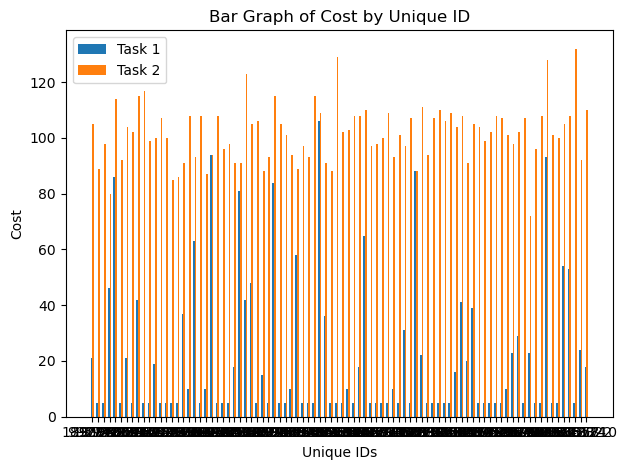

In [ ]:
import matplotlib.pyplot as plt

# Example dictionary
data = {}
for unique_id, subdict in export_tasks.items():
    for key, value in subdict.items():
        if key == "gpt_eval" or key == "gold_eval":
            data[unique_id] = data.get(unique_id, {})
            data[unique_id][key] = data.get(unique_id, {}).get(key, [])
            data[unique_id][key] = value
print(data)

# Prepare the x-axis labels (unique ids) and corresponding bar values
unique_ids = list(data.keys())
tasks = []
third_values = []

for unique_id, subdict in data.items():
    tasks.append(list(subdict.keys()))  # Collect task names for each ID
    third_values.append([value[2] for value in subdict.values()])  # Collect third tuple values

# Number of unique IDs
num_ids = len(unique_ids)

# Positions for bar groups on x-axis
x = np.arange(num_ids)

# Create a bar for each task within a group of unique ids
bar_width = 0.3  # Width of individual bars
fig, ax = plt.subplots()

# Since we have multiple tasks per unique id, loop through the tasks
for i in range(len(tasks[0])):  # Assuming the same number of tasks for each ID
    # Extract the ith task's third value for each unique id
    task_values = [third_values[j][i] for j in range(num_ids)]
    
    # Create a bar for the ith task for each unique id
    ax.bar(x + i * bar_width, task_values, width=bar_width, label=f"Task {i + 1}")

# Customize the plot
ax.set_xlabel("Unique IDs")
ax.set_ylabel("Cost")
ax.set_title("Bar Graph of Cost by Unique ID")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(unique_ids)  # Set x-axis labels to the unique ids
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


0.15025252525252525


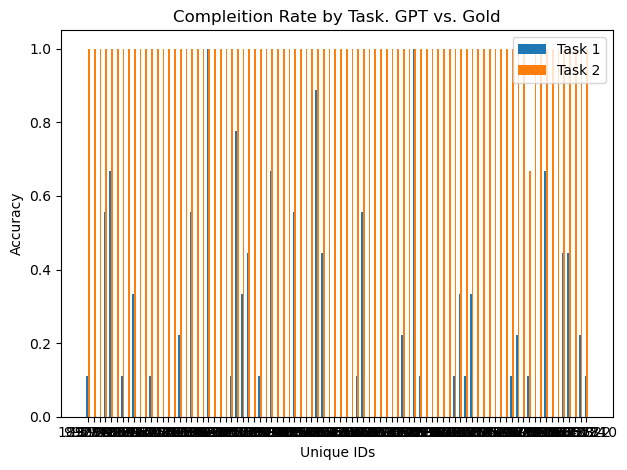

In [ ]:
# Prepare the x-axis labels (unique ids) and corresponding bar values
unique_ids = list(data.keys())
tasks = []
third_values = []

for unique_id, subdict in data.items():
    tasks.append(list(subdict.keys()))  # Collect task names for each ID
    third_values.append([value[1] for value in subdict.values()])  # Collect third tuple values

# Number of unique IDs
num_ids = len(unique_ids)

# Positions for bar groups on x-axis
x = np.arange(num_ids)

# Create a bar for each task within a group of unique ids
bar_width = 0.3  # Width of individual bars
fig, ax = plt.subplots()

# Since we have multiple tasks per unique id, loop through the tasks
for i in range(len(tasks[0])):  # Assuming the same number of tasks for each ID
    # Extract the ith task's third value for each unique id
    task_values = [third_values[j][i] for j in range(num_ids)]
    
    # Create a bar for the ith task for each unique id
    ax.bar(x + i * bar_width, task_values, width=bar_width, label=f"Task {i + 1}")

# Customize the plot
ax.set_xlabel("Unique IDs")
ax.set_ylabel("Accuracy")
ax.set_title("Compleition Rate by Task. GPT vs. Gold")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(unique_ids)  # Set x-axis labels to the unique ids
ax.legend()

print(np.mean(np.array(third_values)[:,0]))

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# SayCanPay Impl
# We take the gold trajectory and use discounting factor 0.9
# Each batch is [[snapshot, gold, history, curr_action, reward], ..., [needed, history, curr_action, reward]]

trajectories = {}

for unique_id, subdict in export_tasks.items():
    for key, value in subdict.items():
        if key == "gold_list":
            trajectories[unique_id] = [subdict.get("gold_list"), subdict.get("room_stocks"),subdict.get("main_stock"), subdict.get("needed_tasks"), subdict.get("gpt_eval"), subdict.get("gpt_list")]
#pprint(trajectories)

reward_traj = defaultdict(list)
for key, value in trajectories.items():
    history = []
    reward = 1
    for i, action in enumerate(value[0]):
        reward = 0.9 ** (len(value[0]) - i - 1)
        snapshot = f'The home has {value[1]}. The pantry has {value[2]}.'
        reward_traj[key].append([snapshot, value[3], value[0][:i], action, reward])

reward_zero = False
for key, value in list(trajectories.items())[::2]:
    history = []
    reward = 1
    for i, action in enumerate(value[5]):
        if action == value[4][3]:
            reward_zero = True
        reward = 0.9 ** (len(value[0]) - i - 1) * (0 if reward_zero else 1)
        unique_id = random.randint(1000000, 9999999)
        snapshot = f'The home has {value[1]}. The pantry has {value[2]}.'
        reward_traj[key+1].append([snapshot, value[3], value[5][:i], action, reward])
    reward_zero = False

pprint(reward_traj)





defaultdict(<class 'list'>,
            {1491688: [['The home has A hallway with  and 6 cleaning supply. \n'
                        'A living room with 5 candle, 4 light bulb and 5 air '
                        'freshener. \n'
                        'A laundry room with 4 laundry basket and 4 lint '
                        'roller. \n'
                        '. The pantry has 0 candle, 0 cleaning supply, 0 light '
                        'bulb, 0 laundry basket, 0 air freshener, 0 lint '
                        'roller.',
                        ['repair garden tool',
                         'polish mirror frame',
                         'polish kitchen faucet',
                         'light five candles',
                         'polish welcome mat',
                         'replace burned light bulbs',
                         'fold clean laundry',
                         'refresh air fresheners',
                         'organize lint rollers'],
                        []

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel

# Sample data dictionary (replace with your actual data)
data = {
    "id1": [
        ["The kitchen has 3 apples", ["go to kitchen", "wash dishes", "go to store", "buy apples"], ["go to kitchen"], "buy apples", 0.9],
        ["The bathroom has soap", ["go to bathroom", "replace soap"], ["go to bathroom"], "replace soap", 1.0]
    ],
    # more data...
}

data = reward_traj

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom Dataset
class TaskDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.samples = []
        
        # Flatten the dictionary into a list of samples
        for uid, tasks in data.items():
            for task in tasks:
                snapshot, goal, history, action, reward = task
                input_text = f"Snapshot: {snapshot}. History: {', '.join(history)}. Goal: {goal}. Next action: {action}."
                self.samples.append((input_text, reward))
    
    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        input_text, reward = self.samples[idx]
        inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', truncation=True, max_length=512)
        return inputs['input_ids'].squeeze(), inputs['attention_mask'].squeeze(), torch.tensor(reward, dtype=torch.float)

# Create Dataset and DataLoader
dataset = TaskDataset(data)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


/Users/fardeen/miniforge3/envs/cs7643-a2/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# BERT Model with a regression layer to predict the reward
class BERTRewardPredictor(nn.Module):
    def __init__(self, model_name='bert-base-uncased'):
        super(BERTRewardPredictor, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)
        self.regressor = nn.Linear(self.bert.config.hidden_size, 1)  # Predict a scalar reward

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output  # Get the [CLS] token representation
        reward_pred = self.regressor(cls_output)  # Output the predicted reward
        return reward_pred.squeeze()


In [ ]:
# Initialize model, loss function, and optimizer
model = BERTRewardPredictor()
criterion = nn.MSELoss()  # Mean Squared Error Loss for reward prediction
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Make sure the model is on CPU
model.to('cpu')

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for input_ids, attention_mask, true_reward in dataloader:
        # Move tensors to device (if using GPU)
        input_ids = input_ids.to('cpu')
        attention_mask = attention_mask.to('cpu')
        true_reward = true_reward.to('cpu')
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        predicted_reward = model(input_ids, attention_mask)
        
        # Compute loss
        loss = criterion(predicted_reward, true_reward)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
    
    # Print loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}")


KeyboardInterrupt: 

In [ ]:
model.eval()

test_snapshot = "The home has: A bedroom with and 1 candle. A kitchen with 1 tomato and 1 soap. A bathroom with and 2 toothpaste. Your home's pantry has: 0 candle, 0 toothpaste, 0 soap, 0 tomato. The tasks you need to comlete are: make tomato soup, clean a dish, brush teeth, light a candle."
test_gold = ["go to bedroom", "light a candle", "go to bathroom", "brush teeth", "go to kitchen", "make tomato soup", "clean a dish"]
test_history = ["go to bedroom", "light a candle", "go to bathroom", "brush teeth"]
test_action = "clean a dish"

input_text = f"Snapshot: {test_snapshot}. History: {', '.join(test_history)}. Goal: {test_gold}. Next action: {test_action}."
inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', truncation=True, max_length=512)

with torch.no_grad():
    input_ids = inputs['input_ids'].to('cpu')
    attention_mask = inputs['attention_mask'].to('cpu')
    predicted_reward = model(input_ids, attention_mask)
    print(f"Predicted Reward: {predicted_reward.item():.4f}")

Predicted Reward: 0.4997


In [ ]:
# Transfering to JSON
import json
print(len(export_tasks))
# with open('export_tasks.json', 'w') as json_file:
#     json.dump(export_tasks, json_file, indent=4)



88


In [34]:
import json

# print(len(reward_traj))
# with open('reward_traj.json', 'w') as json_file:
#     json.dump(reward_traj, json_file, indent=4)

with open('reward_traj.json', 'r') as json_file:
    reward_traj = json.load(json_file)
with open('export_tasks.json', 'r') as json_file:
    export_tasks_dict = json.load(json_file)

In [ ]:
# Building Can Model

# a) build GPT to generate m candidate actions
# b) take top k actions and propogate.
import openai

class Action(BaseModel):
    action: str
    logprob: float

class ActionList(BaseModel):
    actions_list: list[Action]

with open('reward_traj.json', 'r') as json_file:
    reward_traj = json.load(json_file)
with open('export_tasks.json', 'r') as json_file:
    export_tasks_dict = json.load(json_file)

def get_task_dict_keys(key):
    tasks_list  = list(export_tasks_dict[key]["tasks_dict"].keys())
    return tasks_list

def get_task_needs(key):
    task_set = reward_traj[key][0][1]
    needs_prompt = ''
    for task in task_set:
            needs = check_needs(task, stringify=True)
            needs_prompt += f"Task: {task} which needs {needs} and you must be standing in {export_tasks_dict[key]["tasks_dict"][task]["place"]}\n"
    return needs_prompt

def generate_say_actions(model="gpt-4o-2024-08-06", prompt=prompt):
    
    message = client.beta.chat.completions.parse(
        model=model,
        messages=[{"role": "system", "content": "You are an assistant helping generate relevant actions based a instructions to complete many tasks."},
                  {"role": "user", "content": prompt}],
        temperature=0.7, # control creativity level
        #max_tokens=150,   # adjust based on your task complexity
        logprobs=True,
        response_format=ActionList
    )
    return message.choices[0].message.content


def generate_can_actions(model="gpt-4o-2024-08-06", prompt=prompt):
    
    message = client.beta.chat.completions.parse(
        model=model,
        messages=[{"role": "system", "content": "You are an assistant helping evaluate how feasible an action is in the current context."},
                  {"role": "user", "content": prompt}],
        temperature=0.7, # control creativity level
        #max_tokens=150,   # adjust based on your task complexity
        logprobs=True,
        response_format=ActionList
    )
    return message.choices[0].message.content

#res_can = generate_can_actions(model="gpt-4o-2024-08-06", prompt=Can_prompt)


def get_next_can_action(history, key):
    # dynamic
    init_history = str(history)
    # const
    needed_tasks = str(reward_traj[key][0][1])
    snapshot = str(reward_traj[key][0][0])

    Base_prompt = f" Your goal is to complete these tasks, once each: " + get_task_needs(key) + "This was the houses condition before you took any actions: " + snapshot + f" History: Here are the tasks you have already taken/completed. Do not repeat tasks.: " + init_history + f"State: You are currently standing in the {where()}."
    Base_prompt += f"You can choose from 'go to', 'buy', 'refill', and given task actions. Choose from these actions: {', '.join(get_task_dict_keys(key))}."
    Can_prompt = Base_prompt + f"Your job is to rank actions based on whether their preconditions are satisfied. Preconditions include if the player is standing in the correct location and if the amount of resource an action requires is available in the room the action must be completed in. If an action can be completed based on the current state, rank it higher. If it can't be completed given the current state, rank it lower."
    print(Can_prompt)

    res_can = generate_can_actions(model="gpt-4o-2024-08-06", prompt=Can_prompt)
    actions_dict = json.loads(res_can)['actions_list']
    candidate_task_list = []

    for key in actions_dict:
        new_entry = [dict(key)['action'], dict(key)['logprob']]
        candidate_task_list.append(new_entry)
    top_k_actions = sorted(candidate_task_list, key=lambda x: x[1], reverse=True)[:3]
    
    return top_k_actions[0][0]

def get_next_say_action(history, key):
    # dynamic
    init_history = str(history)
    # const
    needed_tasks = str(reward_traj[key][0][1])
    snapshot = str(reward_traj[key][0][0])

    Base_prompt = f" Your goal is to complete these tasks, once each: " + get_task_needs(key) + "This was the houses condition before you took any actions: " + snapshot + f" History: Here are the tasks you have already taken/completed. Do not repeat tasks.: " + init_history + f"State: You are currently standing in the {where()}."
    Base_prompt += f"You can choose from 'go to', 'buy', 'refill', and given task actions. Choose from these actions: {', '.join(get_task_dict_keys(key))}."
    Say_prompt = Base_prompt + f". Generate a list of the next possible actions and the probability that the action will help us to reach the goal given the history. Return just the list of actions ranked by probability; no explanations needed."

    print(Say_prompt)

    res_can = generate_say_actions(model="gpt-4o-2024-08-06", prompt=Say_prompt)
    actions_dict = json.loads(res_can)['actions_list']
    candidate_task_list = []

    for key in actions_dict:
        new_entry = [dict(key)['action'], dict(key)['logprob']]
        candidate_task_list.append(new_entry)
    top_k_actions = sorted(candidate_task_list, key=lambda x: x[1], reverse=True)[:3]
    
    return top_k_actions[0][0]




def get_trajectory(key):
    print(tasks)
    history = []
    trajectory_final = []
    action = 0
    for i in range(12):
        action = get_next_say_action(history, key)
        print(action)

        if "go to" in action or "Go to" in action:
            print(" a go to task was added")
            execute_tasks([action],[action])
        history.append(action)
        trajectory_final.append(action)
    return trajectory_final

eval = []
for key in list(export_tasks_dict.keys())[:10]:
    try:
        tasks = temp_tasks.copy()

        tasks_dict = export_tasks_dict[key]["tasks_dict"]
        tasks = tasks_dict.copy()
        needed_tasks = export_tasks_dict[key]["needed_tasks"]
        big_prompt, task_list = setup_game(needed_tasks)
        prompt = big_prompt[0]

        traj = get_trajectory(key)
        print(traj)
        print("Tasks after generation", tasks)
        print("Room stocks before GPT evaluation: ", room_stocks)
        SayCan_eval = execute_tasks(traj, needed_tasks)
        #SayCan_eval += [traj]
        eval.append(SayCan_eval)

        print(SayCan_eval[0])
        print(SayCan_eval[1])
    except Exception as e:
        print(e)
        print("some error occured in execution. Retrying...")
print(eval)

print(traj, needed_tasks)


     





Setting up the game...
Moved to start.
I've updated room_stocks {'home office': {'cleaning supply': 4}, 'kitchen': {'food item': 8}, 'bedroom': {'bed linen': 5}, 'basement': {'light bulb': 6, 'storage bin': 5, 'tools': 5}, 'store': {}}
WELCOME TO THE GAME! Getting prompt...
{'brush teeth': {'needs': {'toothpaste': 1}, 'depletes': {'toothpaste': 1}, 'place': 'bathroom', 'cost': 15}, 'drink water': {'needs': {'water': 1}, 'depletes': {'water': 1}, 'place': 'kitchen', 'cost': 5}, 'clean dish': {'needs': {'soap': 1}, 'depletes': {'soap': 1}, 'place': 'kitchen', 'cost': 12}, 'make soup': {'needs': {'water': 1, 'tomato': 1}, 'depletes': {'water': 1, 'tomato': 1}, 'place': 'kitchen', 'cost': 12}, 'buy water': {'needs': {}, 'depletes': {}, 'place': 'store', 'cost': 20}, 'buy toothpaste': {'needs': {}, 'depletes': {}, 'place': 'store', 'cost': 10}, 'buy soap': {'needs': {}, 'depletes': {}, 'place': 'store', 'cost': 3}, 'refill toothpaste': {'needs': {}, 'depletes': {}, 'place': 'storage', 'cost

In [ ]:
# tasks = temp_tasks.copy()

# tasks_dict = export_tasks_dict["9927498"]["tasks_dict"]
# tasks = tasks_dict.copy()
# needed_tasks = export_tasks_dict["9927498"]["needed_tasks"]
# big_prompt, task_list = setup_game(needed_tasks)
# eval = execute_tasks(['go to dining room', 'polish dinnerware', 'set dinner table', 'set up dinner table', 'go to home office', 'organize book collection', 'go to laundry room', 'tidy laundry shelf', 'fold clean laundry', 'go to', 'go to dining room', 'go to', 'go to dining room', 'go to'], ['polish dinnerware', 'organize book collection', 'tidy laundry shelf', 'fold clean laundry', 'dust hallway fixtures', 'restock spices rack', 'arrange bed linens', 'set dinner table', 'set up dinner table']
# )
# print(eval)
# print(list(export_tasks_dict.keys())[:20])

Setting up the game...
Moved to start.
I've updated room_stocks {'dining room': {'dishware': 10, 'napkin': 10}, 'home office': {}, 'laundry room': {'hanger': 7}, 'hallway': {'cleaning supply': 4}, 'kitchen': {'spice': 6}, 'bedroom': {'bed linen': 5}, 'store': {}}
WELCOME TO THE GAME! Getting prompt...
Now executing ['go to dining room', 'polish dinnerware', 'set dinner table', 'set up dinner table', 'go to home office', 'organize book collection', 'go to laundry room', 'tidy laundry shelf', 'fold clean laundry', 'go to', 'go to dining room', 'go to', 'go to dining room', 'go to'] AGAINST ['polish dinnerware', 'organize book collection', 'tidy laundry shelf', 'fold clean laundry', 'dust hallway fixtures', 'restock spices rack', 'arrange bed linens', 'set dinner table', 'set up dinner table']
given task list is not a subset of needed tasks
Now executing go to dining room
Going to  dining room
Moved to dining room.
set()
Executed go to dining room for cost 5. New total cost: 5
Now executi

In [ ]:
with open("can_model_eval.json", "w") as file:
    json.dump(eval, file, indent=4)

0.7666666666666666


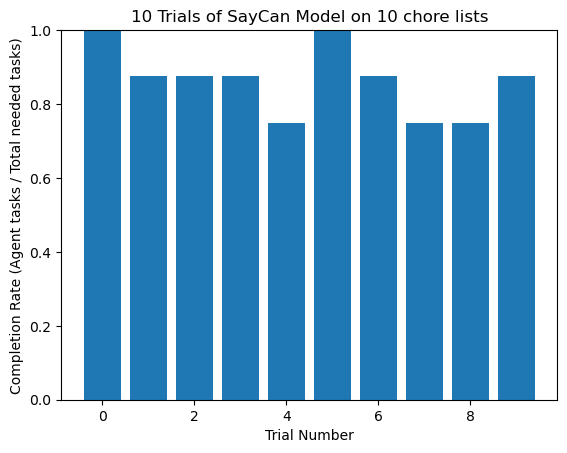

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 2D list
data = eval
second_values = [row[1] for row in data]
average = sum(second_values) / len(second_values)
print(average)
# Extract the second value (the integer) from each row
values = [row[1] for row in data]

# Normalize the values to be between 0.0 and 1.0
normalized_values = [val / max(values) for val in values]

# X-axis: integers from 0 to len(data)-1
x_values = list(range(len(data)))

# Create the bar graph
plt.bar(x_values, normalized_values)

# Add labels and title
plt.xlabel("Trial Number")
plt.ylabel("Completion Rate (Agent tasks / Total needed tasks)")
plt.title("10 Trials of SayCan Model on 10 chore lists")

# Set y-axis range from 0.0 to 1.0
plt.ylim(0, 1)

# Show the graph
plt.show()


In [ ]:
def solver():
    pass
def causal_graph_solver(passes = 3):
    for i in range(passes):
        solver()
        pass

0
1
2


In [47]:
from typing import List, Tuple
from pydantic import BaseModel, conlist

class Reason(BaseModel):
    reason: str
    info: str

class Reasons(BaseModel):
    reasons: list[Reason]

def generate_reason(action, prompt, model="gpt-4o-2024-08-06"):
    example = f"Task: clean kitchen island. Environment: The home has: A kitchen with and 1 wipe. The task: Clean kitchen island needs 2 wipe."
    example += f"In this example, since the kitchen has 1 wipe and the task needs 2 wipes, we don't have enough wipes since 1 is less than 2. So that is the reason why we can't do the task. Also, the reason we can't do the task is that we aren't in the right room! reasons: ['I need to be in the kitchen to complete the task', 'I need 2 wipes to complete the task, I only have 1 wipe'.]"
    example2 = f"Task: set the dinner table. Environment: The home has: A dining room with and 10 napkin. The task set the dinner table needs 10 napkin."
    example2 += f"In this example, since the dining room has 10 napkins and the task needs 10 napkins, we have enough napkins. So that isn't the reason why we can't do the task. The reason we can't do the task is that we aren't in the right room! reasons: ['I need to be in the dining room to complete the task']"

    reasoning_prompt = f" Please return why I cannot {action}? The answer is found in details regarding the environment but you may have to infer some details using common sense: {prompt}."
    reasoning_prompt += f" Here is one example of a good list of reasons you cannot complete a given task in a given environment: {example}"
    reasoning_prompt += f" Here is another good example of how you should return your list of reasons: {example2}"
    reasoning_prompt += f" Assume this is the only task you have to complete. Do not worry about any other task or actions. Do not assume too much, use logic and reason to return reasons succintly and concisely. "
    reasoning_prompt += f" Keep your list of reasons short. 1 to 3 reasons at the most."
    reasoning_prompt += f" Lastly, return what piece of information you used from the environment to generate the reason in a corresponding list"
    message = client.beta.chat.completions.parse(
        model=model,
        messages=[{"role": "system", "content": "You are an expert at listing reasons why a task can't be executed directly."},
                  {"role": "user", "content": reasoning_prompt}],
        temperature=0.5, # control creativity level
        response_format=Reasons
    )
    return message.choices[0].message.parsed



In [36]:
class Bool(BaseModel): 
    bool: bool

def assert_necessary(reason, prompt, model="gpt-4o-2024-08-06"):
    message = client.beta.chat.completions.parse(
        model=model,
        messages=[{"role": "system", "content": "You are an expert at deciding if an action is necessary given an environment"},
                  {"role": "user", "content": "prompt"}],
        temperature=0.5, # control creativity level
        response_format=Bool
    )

In [37]:
class Constraint(BaseModel):
    constraint: str

def generate_constraint(action, prompt, model="gpt-4o-2024-08-06"):
    example = f"Task: clean kitchen island. Environment: The home has: A kitchen with and 1 wipe. The task: Clean kitchen island needs 2 wipe."
    example += f"In this example, since the kitchen has 1 wipe and the task needs 2 wipes, we don't have enough wipes since 1 is less than 2. So that is the reason why we can't do the task. Also, the reason we can't do the task is that we aren't in the right room! reasons: ['I need to be in the kitchen to complete the task', 'I need 2 wipes to complete the task, I only have 1 wipe'.]"
    example2 = f"Task: set the dinner table. Environment: The home has: A dining room with and 10 napkin. The task set the dinner table needs 10 napkin."
    example2 += f"In this example, since the dining room has 10 napkins and the task needs 10 napkins, we have enough napkins. So that isn't the reason why we can't do the task. The reason we can't do the task is that we aren't in the right room! reasons: ['I need to be in the dining room to complete the task']"

    reasoning_prompt = f" Please return why I cannot {action}? The answer is found in details regarding the environment but you may have to infer some details using common sense: {prompt}."
    reasoning_prompt += f" Here is one example of a good list of reasons you cannot complete a given task in a given environment: {example}"
    reasoning_prompt += f" Here is another good example of how you should return your list of reasons: {example2}"
    reasoning_prompt += f" Assume this is the only task you have to complete. Do not worry about any other task or actions. Do not assume too much, use logic and reason to return reasons succintly and concisely. "
    reasoning_prompt += f" Lastly, keep your list of reasons short. 1 to 3 reasons at the most."
    message = client.beta.chat.completions.parse(
        model=model,
        messages=[{"role": "system", "content": "You are an expert at converting reasons for why a task can't be executed into a constraint."},
                  {"role": "user", "content": reasoning_prompt}],
        temperature=0.5, # control creativity level
        response_format=Constraint
    )
    return message.choices[0].message.parsed

In [89]:
class BlockerSolvers(BaseModel):
    actions: list[str]

def generate_actions_solve_blockers(snapshot, action, reasons, info, skill_library, model="gpt-4o-2024-08-06"):
    #blocker_remover_prompt = f"Another LLM said that we can't {action} because {reasons} and used this information: {info} to guide that decision. Here is a snapshot of the environment: {snapshot}."
    blocker_remover_prompt = f"Another LLM said that we can't {action} because {reasons}. Here is a snapshot of the environment: {snapshot}."
    blocker_remover_prompt += f"Choose an action to address why we can't complete the action."
    blocker_remover_prompt += f" Here is a list of actions that can be taken to remove the blockers: {skill_library}."
    blocker_remover_prompt += f" An important note is that the action 'go to' is meant to be modified to 'go to <location>'. So 'go to bedroom' is a legal action for example. The action 'refill <resource>' should be modified to 'refill <location> with <amount> <resource> and the action 'buy <resource>' should be modified to 'buy <amount> <item>'."
    blocker_remover_prompt += f" Remember to be conservative in the actions you take to remove the blocker. The less the better. No need to be too precautionary. A lot of scenarios will be unlocked using just one action."
    blocker_remover_prompt += f" Lastly, remember that you are only returning actions that will remove the reason why we can't do a task. Do not return any other actions that are not necessary to remove the reason why we can't do a task."
    #blocker_remover_prompt += f" Rarely, the LLM makes a mistake and provides a reason that doesn't make sense according the environment, in that case return an empty string response."
    blocker_remover_prompt += f" The most important point is that some of the reasons given by the other LLM are wrong. If you beleive that the LLM is mistaken and the given reason will be ok during execution, return an empty string response. But the reasons given to have to often be solved using some actions."
    
    message = client.beta.chat.completions.parse(
        model=model,
        messages=[{"role": "system", "content": "You are an expert at choosing actions that will remove a given blocker"},
                  {"role": "user", "content": blocker_remover_prompt}],
        temperature=0.6, # control creativity level
        response_format=BlockerSolvers
    )
    return message.choices[0].message.parsed

In [ ]:
# For each action node in action layer:
# 	Reason about why the false marked actions in each action node can’t be completed in the moment. Probe the env to guide the reasoning. If all action nodes are True, base case is reached.

# For each reason:
# 	    generate actions to solve them. Append to action node.
# Once action node is generated:
        # reason about the ordering. 
        # control granularity in accordance with skill library. 
        # chose final action node list using language distance to ensure legal actions. 
        # mark each action with true or false. True if there are no preconditions left to satisfy and we can execute no problem, false otherwise.
# Create new action layer by combining nodes with common actions.
# Pass new action layer up to first line recursively
# Return new action list. 
# Base case: return full graph of SCC’s.





def reorder(action_node):
    print("Is the order of execution logical?")

def language_dist(skill_lib, action):
    print("Pick real action closest in vocab to action")
    pass

def match_action_to_lib(action_node):
    new_action_node = []
    skill_lib = []
    for action in action_node:
        action = language_dist(skill_lib, action)
        new_action_node.append(action)

def action_execution_bool(action):
    print(f"can {action} be executed in the current env with no preconditions?")

def merge_action_nodes(action_layer):
    print("merge nodes with common actions")
    pass

def process_action_layer(action_layer):
    no_base_case = False
    # base case TODO
    for action_node in action_layer:
        for action in action_node:
            if action[1] == False:
                no_base_case = True
                
    if no_base_case == False:
        return "graph"

    for action_node in action_layer:
        for action in action_node:
            reasons = []
            if action[1] == False:
                reason = generate_reason(prompt, action[0])
                reasons.append(reason)
        action_node.next = reasons

    new_action_layer = []

    for action_node in action_layer:
        reasons = action_node.next
        new_action_node = generate_actions_solve_blockers(prompt, reasons)
        new_action_node = reorder(new_action_node)
        new_action_node = match_action_to_lib(new_action_node)
        bool_new_action_node = []
        for action in new_action_node:
            action_execute = action_execution_bool(action)
            bool_new_action_node.append(action_execute)

        reasons.next = bool_new_action_node
        new_action_layer.append(bool_new_action_node)

    new_action_layer = merge_action_nodes(new_action_layer)
    return process_action_layer(new_action_layer)


In [66]:
action = ['clean dish']
snapshot = 'I have no soap and I also have no dishes'
reasons = generate_reason(action[0], snapshot)
print([[reason.reason, reason.info] for reason in reasons.reasons])

[['I have no soap to clean the dish.', 'The environment lacks soap, which is necessary for cleaning.'], ['I have no dishes to clean.', 'The environment lacks dishes to be cleaned.']]


In [91]:
def process_action_layer(action_layer, snapshot, skill_library, needed_task_list):
    # base case TODO
    no_base_case = False
    for action_node in action_layer:
        for action in action_node:
            if action[1] == False:
                no_base_case = True
    if no_base_case == False:
        return "graph"
    
    # GET ACTIONS
    layer_dict = defaultdict(dict)
    for action_node in action_layer:
        for action in action_node:
            layer_dict[tuple(action_node)][action[0]] = []

    # GENERATE REASONS
    for action_node in action_layer:
        for action in action_node:
            reasons = []
            if action[1] == False:
                reasons = generate_reason(action[0], snapshot)
                reason_info_list = [[reason.reason, reason.info] for reason in reasons.reasons]
            layer_dict[tuple(action_node)][action[0]] = reason_info_list

    pprint(layer_dict)

    # GENERATE NEW ACTIONS
    new_action_layer = []
    for dict_action_node in layer_dict.keys():

        for dict_action in layer_dict[dict_action_node].keys():
            reasons = layer_dict[dict_action_node][dict_action]
            temp_action_node = []

            for reason in reasons:
                new_action = generate_actions_solve_blockers(snapshot, dict_action, reason[0], reason[1], skill_library)
                print(dict_action, reason[0], reason[1], new_action.actions)
                temp_action_node.append(new_action.actions)

            temp_action_node_flat = [item for sublist in temp_action_node for item in sublist]
            temp_action_node_flat_filtered = list(set(temp_action_node_flat) - set(needed_task_list))

            new_action_layer.append(temp_action_node_flat_filtered)

    # PROCESS NEW ACTION LAYER
    # First, reason about the ordering, assign bool: True if there are no preconditions left to satisfy and we can execute no problem, false otherwise.


    # for action_node in new_action_layer:
    #     for idx, action in enumerate(action_node):
    #         if action in [row[0][0] for row in action_layer]:
    #             print("repeat")
    #             del action_node[idx]
              
    # return reasons_layer, new_action_layer





chore_list = export_tasks_dict["1890982"]["needed_tasks"]       
task_dict = export_tasks_dict["1890982"]["tasks_dict"]
needed_task_list = export_tasks_dict["1890982"]["needed_tasks"]
tasks = task_dict.copy()
skill_library = tasks.keys()
snapshot = "Currently, the home has: A home office with 4 cleaning supply. \nA kitchen with 8 food item. \nA bedroom with 5 bed linen. \nA basement with 6 light bulb, 5 storage bin and 5 tools. \n. The storage is used to refill items if a room doesn't have enough of the resource for the given tasks: 'refill <room_name> with <amount> <item>'. You must be in the storage to refill items. The storage has 0 cleaning supply, 0 light bulb, 0 storage bin, 0 tools, 0 food item, 0 bed." 
snapshot += "The store is used to buy items if the storage doesn't have enough of the resource for the given tasks: 'buy <amount> <item>'. You must be in the store to buy items. The store has 0 cleaning supply, 0 light bulb, 0 storage bin, 0 tools, 0 food item, 0 bed linen.linen. You are currently standing in the start position which isn't in any room. Lastly, tasks need resources to be in the room where they occur."

task_set = set()
for task in chore_list:
    task_set.add(task)
for task in task_set:
    needs = check_needs(task, stringify=True)
    snapshot += f"The task {task} needs {needs} \n"

init_action_layer = [[(chore, False)] for chore in chore_list]

# print(prompt)
# print(init_action_layer)

process_action_layer(init_action_layer, snapshot, skill_library, needed_task_list)

defaultdict(<class 'dict'>,
            {(('arrange bed linen', False),): {'arrange bed linen': [['I need '
                                                                      'to be '
                                                                      'in the '
                                                                      'bedroom '
                                                                      'to '
                                                                      'complete '
                                                                      'the '
                                                                      'task.',
                                                                      'The '
                                                                      'task '
                                                                      "'arrange "
                                                                      'bed '
                        

In [ ]:
# build one complex example

init_main_stock({'apple': 1, 'candle':0, 'wipe': 0})
init_room_stock({'kitchen': {'apple': 1, 'wipe': 2}, 'bedroom': {'candle': 1}, 'bathroom': {'wipe': 0}, 'store': {'apple': 100, 'candle':100, 'wipe': 100}})
tasks = temp_tasks.copy()
tasks["make apple pie"] = {
                "needs": {
                    "apple": 2
                },
                "depletes": {
                    "apple": 2
                },
                "place": "kitchen",
                "cost": 12
            }
tasks["clean kitchen island"] = {
                "needs": {
                    "wipe": 2
                },
                "depletes": {
                    "wipe": 2
                },
                "place": "kitchen",
                "cost": 6
            }
tasks["clean bathroom"] = {
                "needs": {
                    "wipe": 1
                },
                "depletes": {
                    "wipe": 1
                },
                "place": "bathroom",
                "cost": 8
            }

tasks["light 2 candles"] = {
                "needs": {
                    "candle": 2
                },
                "depletes": {
                    "candle": 2
                },
                "place": "bedroom",
                "cost": 4
            }

tasks["refill " + "apple"] = { "needs" : {}, "depletes" : {}, "place": "storage", "cost": 5}
tasks["buy " + "apple"] = { "needs" : {}, "depletes" : {}, "place": "store", "cost": 3}
tasks["refill " + "candle"] = { "needs" : {}, "depletes" : {}, "place": "storage", "cost": 5}
tasks["buy " + "candle"] = { "needs" : {}, "depletes" : {}, "place": "store", "cost": 3}
tasks["refill " + "wipe"] = { "needs" : {}, "depletes" : {}, "place": "storage", "cost": 5}
tasks["buy " + "wipe"] = { "needs" : {}, "depletes" : {}, "place": "store", "cost": 3}

gold_task_list = ['go to store', 'buy 1 wipe', 'buy 1 candle', 'go to storage', 'refill kitchen with 1 apple', 'go to kitchen','make apple pie', 'clean kitchen island', 'go to storage', 'refill bathroom with 1 wipe', 'go to bathroom', 'clean bathroom', 'go to storage', 'refill bedroom with 1 candle', 'go to bedroom', 'light 2 candles']
execute_tasks(task_list=gold_task_list, needed_tasks = ['make apple pie', 'clean kitchen island', 'clean bathroom', 'light 2 candles'])
        


Now executing ['go to store', 'buy 1 wipe', 'buy 1 candle', 'go to storage', 'refill kitchen with 1 apple', 'go to kitchen', 'make apple pie', 'clean kitchen island', 'go to storage', 'refill bathroom with 1 wipe', 'go to bathroom', 'clean bathroom', 'go to storage', 'refill bedroom with 1 candle', 'go to bedroom', 'light 2 candles'] AGAINST ['make apple pie', 'clean kitchen island', 'clean bathroom', 'light 2 candles']
Now executing go to store
Going to  store
Moved to store.
set()
Executed go to store for cost 5. New total cost: 5
Now executing buy 1 wipe
Bought 1 wipe(s) from the store. 
set()
Executed buy 1 wipe for cost 3. New total cost: 8
Now executing buy 1 candle
Bought 1 candle(s) from the store. 
set()
Executed buy 1 candle for cost 3. New total cost: 11
Now executing go to storage
Going to  storage
Moved to storage.
set()
Executed go to storage for cost 5. New total cost: 16
Now executing refill kitchen with 1 apple
Refilled 1 apple(s) in the kitchen. Main stock left: 0.
se

['Success', 1.0, 86, 'light 2 candles']